---
# **MINICURSO - Processamento e Visualização de Dados Precipitação e Índices de Vegetação com Python (PyVegRain)**
---

## 🟢  **MODULO 1:** Estações Meteorológicas

---


**OBJETIVO:**
Este módulo do curso tem como objetivo aprenderemos como baixar e trabalhar com dados de **Estações Meteorológicas de Superfície (EMS)** do INMET.

---


**DADOS DE ENTRADA**:
- **Tipo do dado:** tabela em formato CSV
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** INMET_SE_MG_A521_BELO HORIZONTE (PAMPULHA)_01-01-2021_A_31-12-2021.CSV
- **Fonte dos dados:** [INMET](https://portal.inmet.gov.br/dadoshistoricos)


---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura e tabela
- **Formato do dado:** arquivo JPG e CSV
- **Imagens geradas:**
    1. A531_Fig_1a_horario_climatologia_precipitacao.jpg
    2. A531_Fig_1b_horario_climatologia_radiacao_e_temperatura.jpg
    3. A531_Fig_2_diario_precipitacao.jpg
    4. A531_Fig_3a_mensal_precipitacao.jpg
    5. A531_Fig_3b_mensal_climatologia_precipitacao.jpg
    6. A531_Fig_3b_mensal_climatologia_precipitacao.jpg
    7. A531_tabela_mensal.csv



---

**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nesse código:

1.   Instalação de bibliotecas
2.   Importação de biblotecas
3.   Montando drive
4.   Definindo caminho do drive
5.   Baixando e descompactando arquivos
6.   Escolhendo a estação meteorológica
7.   Plotar gráfico do **ciclo horário**
8.   Plotar gráfico do **ciclo diário**
9.   Plotar gráfico do **ciclo mensal**
10.  Plotar gráfico do **ciclo anual**
11.  Salvar os dados em arquivo **csv**


---

- **Todas** as estações retornam as seguintes variáveis:
    1.  PRECIPITAÇÃO TOTAL, HORÁRIO [mm]
    2.  PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA [mB]
    3.  PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) [mB]
    4.  PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) [mB]
    5.  RADIACAO GLOBAL [Kj/m²]
    6.  TEMPERATURA DO AR - BULBO SECO, HORARIA [°C]
    7.  TEMPERATURA DO PONTO DE ORVALHO [°C]
    8.  TEMPERATURA MÁXIMA NA HORA ANT. (AUT) [°C]
    9.  TEMPERATURA MÍNIMA NA HORA ANT. (AUT) [°C]
    10. TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) [°C]
    11. TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) [°C]
    12. UMIDADE REL. MAX. NA HORA ANT. (AUT) [%]
    13. UMIDADE REL. MIN. NA HORA ANT. (AUT) [%]
    14. UMIDADE RELATIVA DO AR, HORARIA [%]
    15. VENTO, DIREÇÃO HORARIA [gr]
    16. VENTO, RAJADA MAXIMA [m/s]
    17. VENTO, VELOCIDADE HORARIA [m/s]

---




**OBSERVAÇÕES IMPORTANTES**:
1. Vocês deverão escolher a estação de superfície pelo **código**.



---
**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 04/09/2025




---



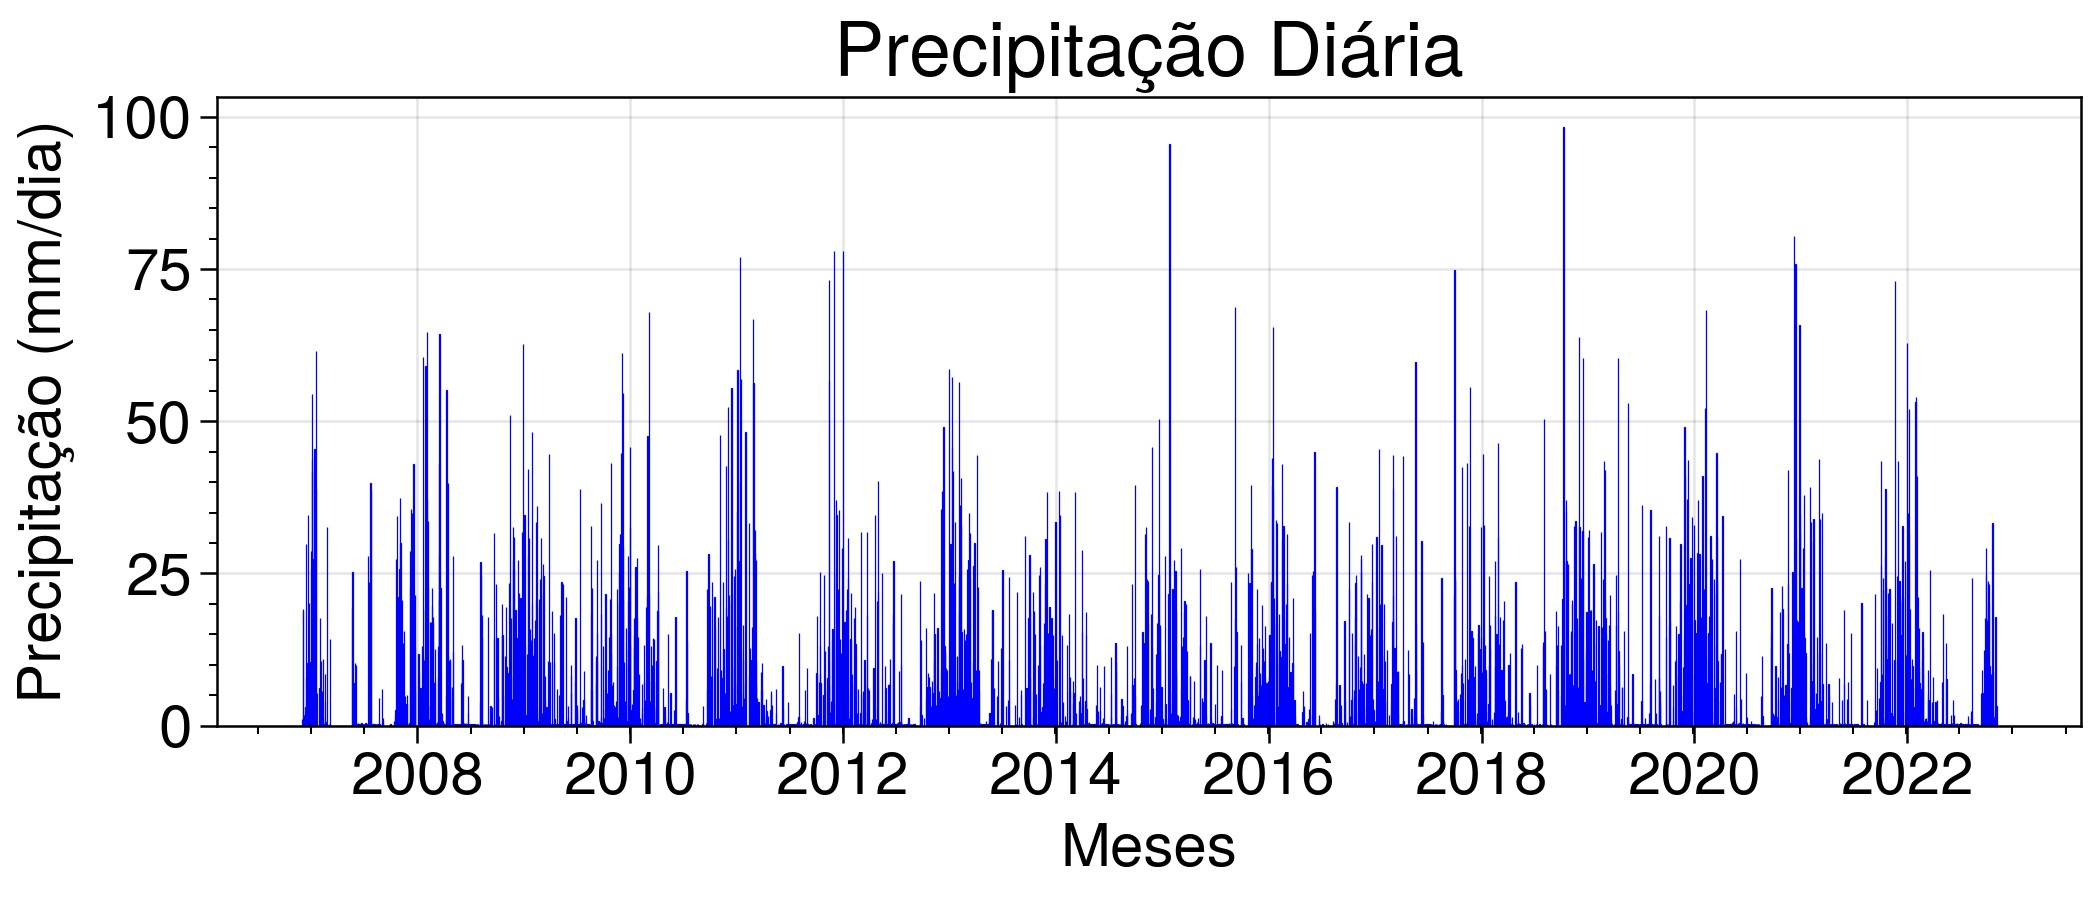

# **1° Passo:** Instalando bibliotecas

Vamos instalar a biblioteca Ultraplot que serve para visualização meteorológica especializada com suporte a projeções cartográficas e dados atmosféricos.

In [ ]:
!pip install -q ultraplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 33.9 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [ ]:
import numpy as np                # Fundamentos numéricos: Arrays multidimensionais de alto desempenho e operações matemáticas
import pandas as pd               # Estruturas de dados intuitivas (Series/DataFrames) para análise e manipulação de dados eficiente
import matplotlib.pyplot as plt   # Visualização de dados 2D/3D com gráficos estáticos, interativos e publicáveis
import ultraplot as uplt          # Visualização meteorológica especializada com suporte a projeções cartográficas e dados atmosféricos
import seaborn as sns             # Visualização estatística de alto nível baseada em matplotlib com estilos pré-definidos
import os                         # Interface multiplataforma para operações do sistema: caminhos, arquivos, diretórios e variáveis de ambiente
import zipfile                    # Compactação e descompactação de arquivos ZIP com suporte a diferentes métodos de compressão
import time                       # Funções para medição de tempo, conversão de formatos temporais e controle de execução
import glob                       # Busca de caminhos em sistemas de arquivos usando padrões wildcard (*, ?) de forma recursiva
import folium                     # Criação de mapas interativos baseados em Leaflet.js com marcadores, camadas e visualizações geoespaciais
import requests                   # Cliente HTTP elegante e simples para fazer requisições web (GET, POST, etc) com suporte a sessões
import warnings                   # Gerenciamento de mensagens de aviso do Python com controle granular de exibição
warnings.filterwarnings("ignore") # Configuração global para suprimir todas as mensagens de warning durante a execução

/usr/local/lib/python3.11/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA MICROFISICA DE NUVENS/AULA_03_ESTACOES_METEOROLOGICAS'

- Criando a pasta de saída ("input")

In [ ]:
os.makedirs(f'{dir}/input/', exist_ok=True)

- Criando a pasta de saída ("output")

In [ ]:
os.makedirs(f'{dir}/output/', exist_ok=True)

# **PARTE 1):** Baixando e descompactando os arquivos das estações meteorológicas

A primeira etapa será baixar os dados do INMET. Os dados serão baixados diretamento do [site](https://portal.inmet.gov.br/dadoshistoricos) do INMET para o `/content/` do nosso drive. Lembrando que ao fechar o código esses dados serão apagados automaticamente.


In [ ]:
# caminho dos dados históricos do INMET
url_inmet =  'https://portal.inmet.gov.br/uploads/dadoshistoricos/'

# baixando os dados do INMET
!wget {url_inmet}/2020.zip -P /content/
!wget {url_inmet}/2021.zip -P /content/
!wget {url_inmet}/2022.zip -P /content/
!wget {url_inmet}/2023.zip -P /content/
!wget {url_inmet}/2024.zip -P /content/

--2025-07-09 02:46:10--  https://portal.inmet.gov.br/uploads/dadoshistoricos//2020.zip
Resolving portal.inmet.gov.br (portal.inmet.gov.br)... 200.130.106.20, 191.217.186.220
Connecting to portal.inmet.gov.br (portal.inmet.gov.br)|200.130.106.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103653055 (99M) [application/zip]
Saving to: ‘/content/2020.zip’

2020.zip            100%[===================>]  98.85M  22.3MB/s    in 5.2s    

2025-07-09 02:46:16 (18.9 MB/s) - ‘/content/2020.zip’ saved [103653055/103653055]

--2025-07-09 02:46:16--  https://portal.inmet.gov.br/uploads/dadoshistoricos//2021.zip
Resolving portal.inmet.gov.br (portal.inmet.gov.br)... 200.130.106.20, 191.217.186.220
Connecting to portal.inmet.gov.br (portal.inmet.gov.br)|200.130.106.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80571564 (77M) [application/zip]
Saving to: ‘/content/2021.zip’

2021.zip            100%[===================>]  76.84M  20.8MB/s   

Agora iremos descompactar os dados

In [ ]:
# ano inicial
anoi = 2020

# ano final
anof = 2024

# loop nos anos
for ano in range(anoi, anof+1):

    print('DESCOMPACTANDO ANO === >>>', ano)

    # abre o arquivo ZIP e extrai tudo
    with zipfile.ZipFile(f'/content/{str(ano)}.zip', 'r') as zip_ref:

        zip_ref.extractall("/content/")

DESCOMPACTANDO ANO === >>> 2020
DESCOMPACTANDO ANO === >>> 2021
DESCOMPACTANDO ANO === >>> 2022
DESCOMPACTANDO ANO === >>> 2023
DESCOMPACTANDO ANO === >>> 2024


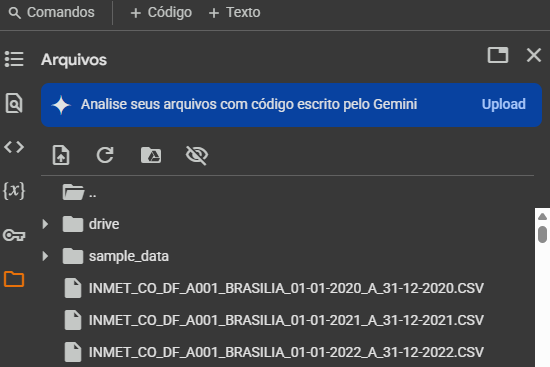

Veja que os nomes dos arquivos possuem a seguinte formatação:

- `INMET_CO_DF_A001_BRASILIA_01-01-2020_A_31-12-2020.CSV`:

    1. INMET: dados do INMET
    2. CO: região do Brasil
    3. DF: unidade da federação
    4. A001: código da estação
    5. BRASILIA: cidade
    6. 01-01-2020: ano, mês e dia inicial
    7. 31-12-2020: ano, mês e dia final



# **PARTE 2):** Escolhendo a estação meteorológica que será analisada

Primeiro precisamos saber quais estações temos disponíveis do INMET. Para isto utilizaremos uma planilha que contém as informações como código da estação, localidade e demais informações. Esta planilha esta disponível no drive da [disciplina](https://github.com/evmpython/CAT212_2025/tree/main/input) e iremos ler diretamente com o pandas.

In [ ]:
# local da planilha que contém as informações das estações meteorológicas
url = 'https://raw.githubusercontent.com/evmpython/CAT212_2025/main/input/CatalogoEsta%C3%A7%C3%B5esAutom%C3%A1ticas.csv'

# leitura da planilha
df = pd.read_csv(url,
                 sep=';',
                 converters={'VL_LATITUDE': lambda x: float(x.replace(',', '.')),
                             'VL_LONGITUDE': lambda x: float(x.replace(',', '.')),
                             'VL_ALTITUDE': lambda x: float(x.replace(',', '.'))})

# mostra a tabela
df

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
0,ABROLHOS,BA,Pane,-17.963056,-38.703333,20.93,20/07/2008,A422
1,ACARAU,CE,Pane,-3.121111,-40.087222,67.15,21/04/2009,A360
2,AFONSO CLAUDIO,ES,Operante,-20.104167,-41.106944,507.48,23/09/2011,A657
3,AGUA BOA,MT,Operante,-14.016389,-52.211667,440.00,15/12/2006,A908
4,AGUA CLARA,MS,Operante,-20.444444,-52.875833,323.63,13/08/2010,A756
...,...,...,...,...,...,...,...,...
559,VITORIA,ES,Operante,-20.270833,-40.305833,9.00,30/10/2006,A612
560,VITORIA DA CONQUISTA,BA,Operante,-14.886389,-40.801389,879.38,31/05/2007,A414
561,XANXERE,SC,Operante,-26.938611,-52.398056,878.74,14/03/2008,A858
562,XINGUARA,PA,Operante,-7.110556,-49.926111,245.00,10/09/2016,A247


Veja que ao todo temos `564` estações meteorológicas *automáticas* do INMET distribuídas pelo Brasil.

- Escolha abaixo o Estado

In [ ]:
# sigla do estado
uf = 'MG'

# escolhendo as estações do estado
estacoes_estado = df.groupby('SG_ESTADO').get_group(uf)
estacoes_estado

,DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
6,AGUAS VERMELHAS,MG,Operante,-15.751667,-41.457778,754.07,08/09/2007,A549
7,AIMORES,MG,Operante,-19.532778,-41.090833,301.00,04/08/2007,A534
12,ALMENARA,MG,Operante,-16.166667,-40.687778,189.11,14/12/2002,A508
29,ARACUAI,MG,Operante,-16.848889,-42.035278,308.00,18/05/2017,A566
36,ARAXA,MG,Operante,-19.605833,-46.949722,1018.32,18/12/2002,A505
...,...,...,...,...,...,...,...,...
539,UBERABA,MG,Operante,-19.710000,-47.961944,778.00,18/05/2017,A568
540,UBERLANDIA,MG,Operante,-18.916944,-48.255556,874.77,17/12/2002,A507
542,UNAI,MG,Operante,-16.554167,-46.881944,640.85,15/06/2007,A542
552,VARGINHA,MG,Operante,-21.566389,-45.404167,949.78,12/07/2006,A515


Mostrando as estações num mapa interativo

In [ ]:
# Dados
data = {"DC_NOME": list(estacoes_estado['DC_NOME'].values),
        "SG_ESTADO": list(estacoes_estado['SG_ESTADO'].values),
        "VL_LATITUDE": list(estacoes_estado['VL_LATITUDE'].values),
        "VL_LONGITUDE": list(estacoes_estado['VL_LONGITUDE'].values),
        "VL_ALTITUDE": list(estacoes_estado['VL_ALTITUDE'].values),
        "CD_ESTACAO": list(estacoes_estado['CD_ESTACAO'].values)}
df_estacoes_do_estado = pd.DataFrame(data)

# Dicionário com a latitude e longitude central de cada estado do Brasil
centros_estados = {'AC': {'latitude': -8.7742, 'longitude': -70.6108},
                   'AL': {'latitude': -9.7193, 'longitude': -36.8230},
                   'AM': {'latitude': -3.4167, 'longitude': -65.8560},
                   'AP': {'latitude': 1.3025, 'longitude': -51.7750},
                   'BA': {'latitude': -12.5780, 'longitude': -41.3983},
                   'CE': {'latitude': -5.4880, 'longitude': -39.3206},
                   'DF': {'latitude': -15.7801, 'longitude': -47.9292},
                   'ES': {'latitude': -20.3155, 'longitude': -40.3128},
                   'GO': {'latitude': -16.6864, 'longitude': -49.2644},
                   'MA': {'latitude': -5.3180, 'longitude': -45.2593},
                   'MT': {'latitude': -12.6376, 'longitude': -56.0907},
                   'MS': {'latitude': -20.4394, 'longitude': -54.6010},
                   'MG': {'latitude': -18.5152, 'longitude': -44.2553},
                   'PA': {'latitude': -5.8657, 'longitude': -52.2036},
                   'PB': {'latitude': -7.2765, 'longitude': -36.7813},
                   'PR': {'latitude': -25.3981, 'longitude': -51.9252},
                   'PE': {'latitude': -8.0437, 'longitude': -35.1009},
                   'PI': {'latitude': -6.2159, 'longitude': -42.7853},
                   'RJ': {'latitude': -22.9083, 'longitude': -43.1964},
                   'RN': {'latitude': -5.7945, 'longitude': -36.5982},
                   'RS': {'latitude': -30.0396, 'longitude': -51.2177},
                   'RO': {'latitude': -11.3033, 'longitude': -62.2950},
                   'RR': {'latitude': 2.8144, 'longitude': -60.6835},
                   'SC': {'latitude': -27.5954, 'longitude': -48.5480},
                   'SP': {'latitude': -23.5505, 'longitude': -46.6333},
                   'SE': {'latitude': -10.9472, 'longitude': -37.0731},
                   'TO': {'latitude': -10.2513, 'longitude': -48.2971}}

# Criar o mapa
mapa = folium.Map(location=[centros_estados[uf]['latitude']+2.5,
                            centros_estados[uf]['longitude']],
                            zoom_start=6.4)

# URL direta para o GeoJSON bruto do estado
geojson_url = f"https://raw.githubusercontent.com/giuliano-macedo/geodata-br-states/main/geojson/br_states/br_{uf.lower()}.json"

# Ler o GeoJSON diretamente da web
response = requests.get(geojson_url)
geojson = response.json()

# Adicionar contorno do estado no mapa
folium.GeoJson(geojson,
               name="Limite Estado",
               style_function=lambda x: {"fillColor": "none",
                                         "color": "red",
                                         "weight": 2,
                                         "dashArray": "5, 5"}).add_to(mapa)

# Adicionar marcadores
for _, row in df_estacoes_do_estado.iterrows():

    folium.Marker(

                  # localização dos markers
                  location =  [row["VL_LATITUDE"], row["VL_LONGITUDE"] ],

                  # Popup com estilo customizado (fonte maior e cores alteradas) - O "popup" aparecerá quando você clicar no marcador
                  popup = folium.Popup( f"<div style='text-align: center;'>"
                                        f"<b style='font-size: 14pt; color: red;'>{row['DC_NOME']}</b><br>"
                                        f"<span style='font-size: 12pt; color: green;'>{row['CD_ESTACAO']}</span><br>"
                                        f"<span style='font-size: 12pt; color: gray;'>{row['VL_ALTITUDE']} m</span>",
                                        max_width=600),

                 # Tooltip com estilo customizado (fonte maior e cor alterada) - O "tooltip" aparece quando você passa o mouse sobre o marcador
                 tooltip = folium.Tooltip( f"<span style='font-size: 12pt; color: purple;'>{row['DC_NOME']}</span>" )

                 ).add_to(mapa)

# Mostrar mapa
mapa

Baseado no mapa interativo acima, escolha uma estação para ser analisada. Para isso, click numa estação e copie o código da estação e substitua na variável `estacao` declarada abaixo.

In [ ]:
estacao = 'A509'

**Leitura dos arquivos `CSV`**. Agora iremos ler todos os arquivos CSV dos quatro anos de dados da estação escolhida.

In [ ]:
# listando os arquivos daquela estação
files = sorted(glob.glob(f'/content/INMET*{estacao}*'))
files

['/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2020_A_31-12-2020.CSV',
 '/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2021_A_31-12-2021.CSV',
 '/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2022_A_31-12-2022.CSV',
 '/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2023_A_31-12-2023.CSV',
 '/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2024_A_31-12-2024.CSV']

In [ ]:
# lista vazia para armazenar os DataFrames de cada ano
dfs = []

# loop nos arquivos
for file in files:

    print(file)

    # leitura da tabela
    df = pd.read_csv(file, encoding='iso-8859-1', skiprows=8,  decimal=',', delimiter=';')

    # adiciona o DataFrame à lista inicial
    dfs.append(df)

/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2020_A_31-12-2020.CSV
/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2021_A_31-12-2021.CSV
/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2022_A_31-12-2022.CSV
/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2023_A_31-12-2023.CSV
/content/INMET_SE_MG_A509_MONTE VERDE_01-01-2024_A_31-12-2024.CSV


Após esse procedimento, a lista `dfs` conterá os `DataFrames` correspondentes aos dados de cada ano de 2020 à 2024. Isso vai permitir que você tenha acesso aos dados e faça análises ou manipulações posteriores com eles com Python.

Mas antes, vamos precisar organizar os dados da lista com `pd.concat()` e colocá-los no formato final.

In [ ]:
# concatenar DataFrames
dados = pd.concat(dfs, ignore_index=True)
dados

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7,NaN
1,2020/01/01,0100 UTC,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4,NaN
2,2020/01/01,0200 UTC,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2,NaN
3,2020/01/01,0300 UTC,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0,NaN
4,2020/01/01,0400 UTC,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43843,2024/12/31,1900 UTC,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9,NaN
43844,2024/12/31,2000 UTC,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1,NaN
43845,2024/12/31,2100 UTC,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6,NaN
43846,2024/12/31,2200 UTC,0.0,846.4,846.7,846.4,93.9,17.1,12.9,19.6,17.1,13.1,12.1,77.0,64.0,77.0,80.0,4.2,1.3,NaN


In [ ]:
# remover linhas da coluna "Precipitação" com "NaN"
dados.dropna(subset=['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], inplace=True)
dados

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7,NaN
1,2020/01/01,0100 UTC,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4,NaN
2,2020/01/01,0200 UTC,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2,NaN
3,2020/01/01,0300 UTC,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0,NaN
4,2020/01/01,0400 UTC,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43843,2024/12/31,1900 UTC,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9,NaN
43844,2024/12/31,2000 UTC,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1,NaN
43845,2024/12/31,2100 UTC,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6,NaN
43846,2024/12/31,2200 UTC,0.0,846.4,846.7,846.4,93.9,17.1,12.9,19.6,17.1,13.1,12.1,77.0,64.0,77.0,80.0,4.2,1.3,NaN


In [ ]:
# remover a coluna "Unnamed: 19"
dados.drop(['Unnamed: 19'], axis=1, inplace=True)
dados.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
1,2020/01/01,0100 UTC,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2,2020/01/01,0200 UTC,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
3,2020/01/01,0300 UTC,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
4,2020/01/01,0400 UTC,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5


Observe que temos uma coluna `Data` para ano/mês/dia e outra `Hora UTC` para hora e minuto. Iremos juntar as duas colunas numa única coluna no formato `ano-mês-dia hora:minuto:segundo`.  

In [ ]:
# Concatenar "Data" e "Hora UTC" e converter para datetime
dados['Data_Hora'] = dados['Data'] + ' ' + dados['Hora UTC'].str.replace(' UTC', '', regex=False)
dados['Data_Hora'] = pd.to_datetime(dados['Data_Hora'], format='%Y/%m/%d %H%M')

# Definir como índice
dados.set_index('Data_Hora', inplace=True)

# Remover colunas antigas
dados.drop(columns=['Data', 'Hora UTC'], inplace=True)

# Exibir as primeiras linhas do dataframe atualizado
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
2020-01-01 01:00:00,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2020-01-01 02:00:00,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
2020-01-01 03:00:00,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
2020-01-01 04:00:00,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9
2024-12-31 20:00:00,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1
2024-12-31 21:00:00,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6


**Utilizando a coluna de índices (nesse exemplo são as datas) para selecionar um tempo específico**: função `loc`

In [ ]:
# selecionando os dados do dia 01, mês 12, ano 2006 às 17 h 00 min e 00 seg
dados.loc['2024-12-03 17:00:00']

,2024-12-03 17:00:00
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",1.4
"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",844.8
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),845.1
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),844.7
RADIACAO GLOBAL (Kj/m²),649.5
"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",18.4
TEMPERATURA DO PONTO DE ORVALHO (°C),NaN
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),18.6
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),17.7
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),NaN


In [ ]:
# selecionado desta data/horário apenas a coluna de radiação ("Rad")
dados.loc['2024-12-03 17:00:00']['RADIACAO GLOBAL (Kj/m²)']

np.float64(649.5)

In [ ]:
# selecionado desta data/horário as colunas de precipitação, radiação e Temperatura
dados.loc['2024-12-03 09:00:00'][['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (Kj/m²)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']]

,2024-12-03 09:00:00
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",2.8
RADIACAO GLOBAL (Kj/m²),15.1
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),17.4


In [ ]:
# selecionando um intervalo de tempo. Neste exemplo estamos selecionado das 17 às 20 horas UTC
dados.loc['2024-12-03 17:00:00': '2024-12-03 20:00:00']

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2024-12-03 17:00:00,1.4,844.8,845.1,844.7,649.5,18.4,NaN,18.6,17.7,NaN,NaN,NaN,NaN,NaN,285.0,4.3,0.9
2024-12-03 18:00:00,0.8,844.3,844.8,844.3,525.5,17.8,NaN,18.4,17.7,NaN,NaN,NaN,NaN,NaN,268.0,6.8,2.4
2024-12-03 19:00:00,0.2,843.8,844.3,843.7,752.5,18.3,NaN,18.5,17.7,NaN,NaN,NaN,NaN,NaN,256.0,6.8,1.6
2024-12-03 20:00:00,0.0,843.8,843.9,843.7,328.2,18.3,18.3,18.3,18.0,18.3,18.0,100.0,100.0,100.0,276.0,4.3,0.9


# **PARTE 3):**  Ciclo Horário: climatologia

In [ ]:
# dados que utilizaremos
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
2020-01-01 01:00:00,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2020-01-01 02:00:00,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
2020-01-01 03:00:00,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
2020-01-01 04:00:00,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9
2024-12-31 20:00:00,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1
2024-12-31 21:00:00,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6


In [ ]:
# climatológica
horaria_climatologica = dados.groupby(dados.index.hour).mean()
horaria_climatologica

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
0,0.264651,849.505772,849.564046,849.141836,0.133333,13.712424,10.574118,14.394667,13.532985,11.045793,10.301110,82.336375,78.507823,81.222876,179.131941,3.843430,1.129412
1,0.211025,849.646692,849.747023,849.417420,0.075806,13.324807,10.392227,13.954465,13.102867,10.895148,10.124344,83.474820,79.748201,82.251958,178.874311,3.679383,1.090739
2,0.163566,849.557733,849.775124,849.465988,0.062500,12.956962,10.198171,13.581728,12.715245,10.701565,9.908284,84.372154,80.796357,83.100522,176.776555,3.563071,1.043974
3,0.155041,849.266997,849.606777,849.221983,0.110959,12.610028,10.030341,13.244848,12.354435,10.510203,9.736763,85.047650,81.672324,83.884892,175.800000,3.405399,0.977851
4,0.140663,848.897182,849.313260,848.859006,0.124286,12.315083,9.871916,12.942873,12.016077,10.368483,9.547566,85.853962,82.491159,84.706693,176.521547,3.289006,0.961657
5,0.179128,848.501049,848.916234,848.465765,0.102857,12.070569,9.760381,12.690723,11.746273,10.262073,9.412097,86.393979,83.345121,85.325673,177.606847,3.209498,0.928493
6,0.128018,848.247951,848.547730,848.183721,0.098551,11.859358,9.668602,12.469048,11.513123,10.196245,9.311551,86.902760,83.942181,85.791694,175.285161,3.168605,0.927962
7,0.101273,848.198506,848.359214,848.065412,0.125352,11.688655,9.569155,12.249585,11.317045,10.058460,9.183575,87.209073,84.437212,86.141161,174.521306,3.160764,0.939292
8,0.123204,848.395856,848.453757,848.119503,5.485246,11.559116,9.510290,12.133315,11.152155,10.009348,9.086750,87.455141,84.831586,86.396711,175.725414,3.168232,0.945856


Primeiro iremos plotar a precipitação climatológica média horária:

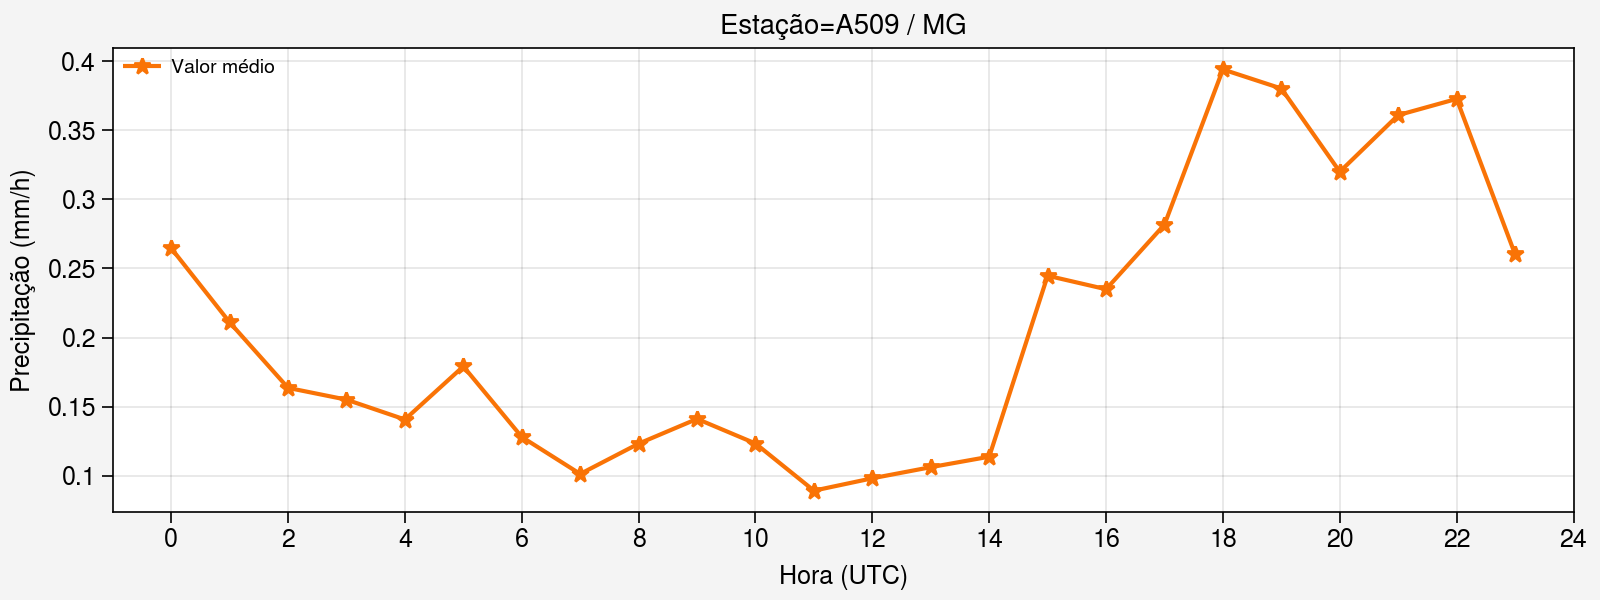

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8,3), tight=True)

# plota a precipitação
ax.plot(uplt.arange(0, 23, 1),
        horaria_climatologica['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
        color='orange',
        marker='*',
        label='Valor médio')

# formatação dos eixos X e Y
ax.format(title=f'Estação={estacao} / {uf}',
          xlabel='Hora (UTC)',
          ylabel='Precipitação (mm/h)',
          xticks=2,
          xtickminor=False,
          ytickminor=False,
          xlim=(-1,24))

# legendas
ax.legend(frameon=False, loc='ul', prop={'size': 7})

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_1a_horario_climatologia_precipitacao.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

Agora iremos plotar a radiação, temperatura mínima e máxima climatológica média horária:

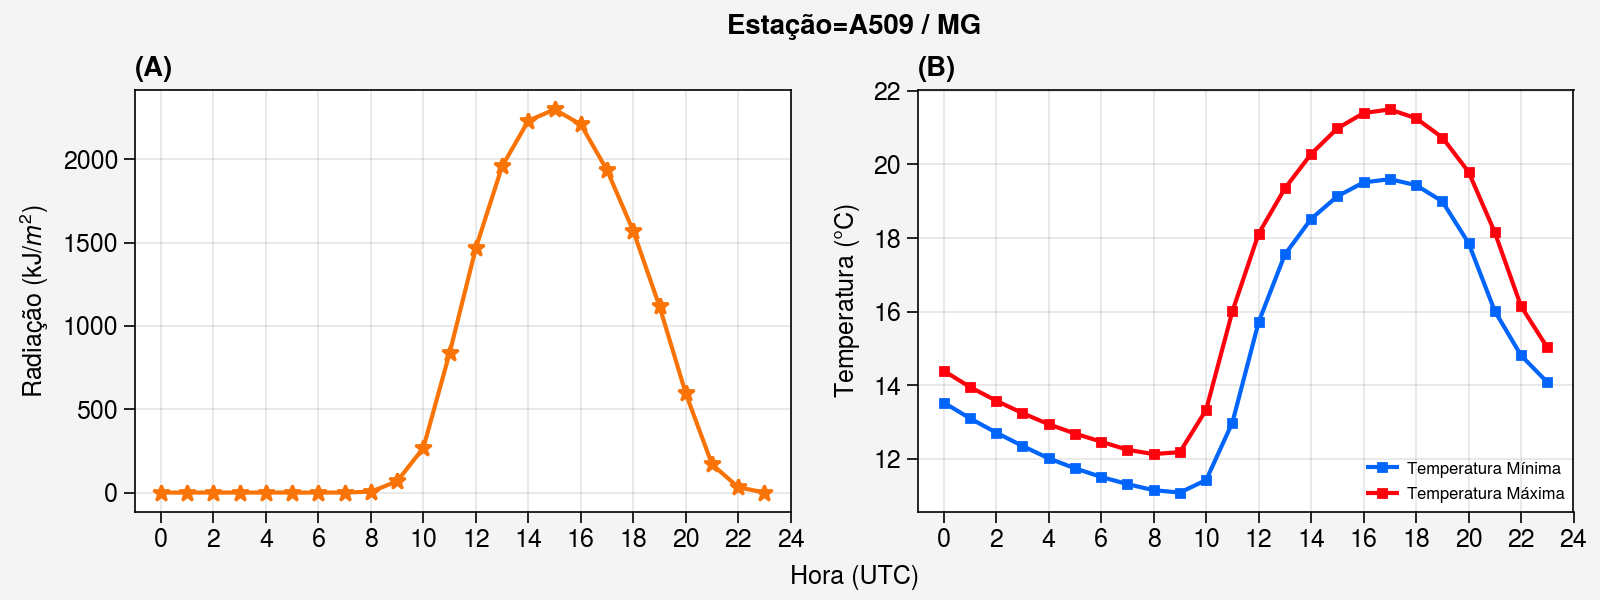

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(8,3), ncols=2, sharex=True, sharey=False, tight=True)

# formato dos eixos
ax.format(suptitle=f'Estação={estacao} / {uf}', xlabel='Hora (UTC)', xticks=2, xtickminor=False, ytickminor=False, xlim=(-1,24), abc='(A)')

# radiação
ax[0].plot(uplt.arange(0, 23, 1), horaria_climatologica['RADIACAO GLOBAL (Kj/m²)'], color='orange', marker='*')
ax[0].format(ylabel='Radiação (kJ/$m^{2}$)')

# temperaturas
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'],
           color='bright blue', marker='s', markersize=3, label='Temperatura Mínima')
ax[1].plot(uplt.arange(0, 23, 1), horaria_climatologica['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', marker='s', markersize=3, label='Temperatura Máxima')
ax[1].format(ylabel='Temperatura ($\degree$C)')

# legendas
ax[1].legend(frameon=False, loc='lr', prop={'size': 6}, ncols=1)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_1b_horario_climatologia_radiacao_e_temperatura.jpg', dpi=300)

# exibe a figura na tela
uplt.show()

# **PARTE 4):**  Ciclo Diário: total

In [ ]:
# dados que utilizaremos
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
2020-01-01 01:00:00,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2020-01-01 02:00:00,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
2020-01-01 03:00:00,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
2020-01-01 04:00:00,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9
2024-12-31 20:00:00,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1
2024-12-31 21:00:00,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6


In [ ]:
# agrupa os dados
diaria = dados.groupby(pd.Grouper(freq='1D')).mean()

In [ ]:
# a chuva é somada
diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1D')).sum()

In [ ]:
diaria

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01,0.4,844.866667,845.129167,844.633333,1668.314286,18.895833,14.058333,19.787500,18.291667,14.754167,13.450000,78.250000,72.166667,75.458333,298.208333,5.037500,1.558333
2020-01-02,52.2,844.341667,844.608333,844.058333,698.542857,17.204167,14.754167,17.754167,16.783333,15.133333,14.287500,87.708333,82.708333,85.958333,301.541667,3.879167,1.179167
2020-01-03,7.2,845.237500,845.437500,845.041667,1415.157143,17.112500,14.516667,17.775000,16.687500,14.941667,14.050000,88.125000,82.750000,85.958333,302.208333,4.062500,1.458333
2020-01-04,1.2,844.091667,844.345833,843.879167,949.521429,16.650000,13.733333,17.370833,16.125000,14.304167,13.329167,86.833333,80.833333,83.916667,297.166667,4.479167,1.508333
2020-01-05,12.4,843.425000,843.712500,843.145833,955.950000,17.070833,13.650000,17.670833,16.558333,14.083333,13.141667,83.708333,78.541667,81.458333,298.291667,4.025000,1.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,49.6,845.691667,845.845833,845.408333,433.680000,17.612500,17.242857,17.833333,17.408333,17.385714,16.850000,98.500000,96.571429,97.571429,233.125000,6.012500,1.383333
2024-12-28,4.4,847.370833,847.608333,847.175000,1772.614286,19.595833,15.915000,20.208333,18.820833,16.680000,15.180000,84.100000,74.600000,79.000000,188.875000,3.775000,1.095833
2024-12-29,21.8,846.387500,846.641667,846.145833,871.328571,17.245833,13.316667,18.016667,16.620833,13.800000,12.750000,80.666667,74.791667,78.375000,113.833333,5.225000,1.587500


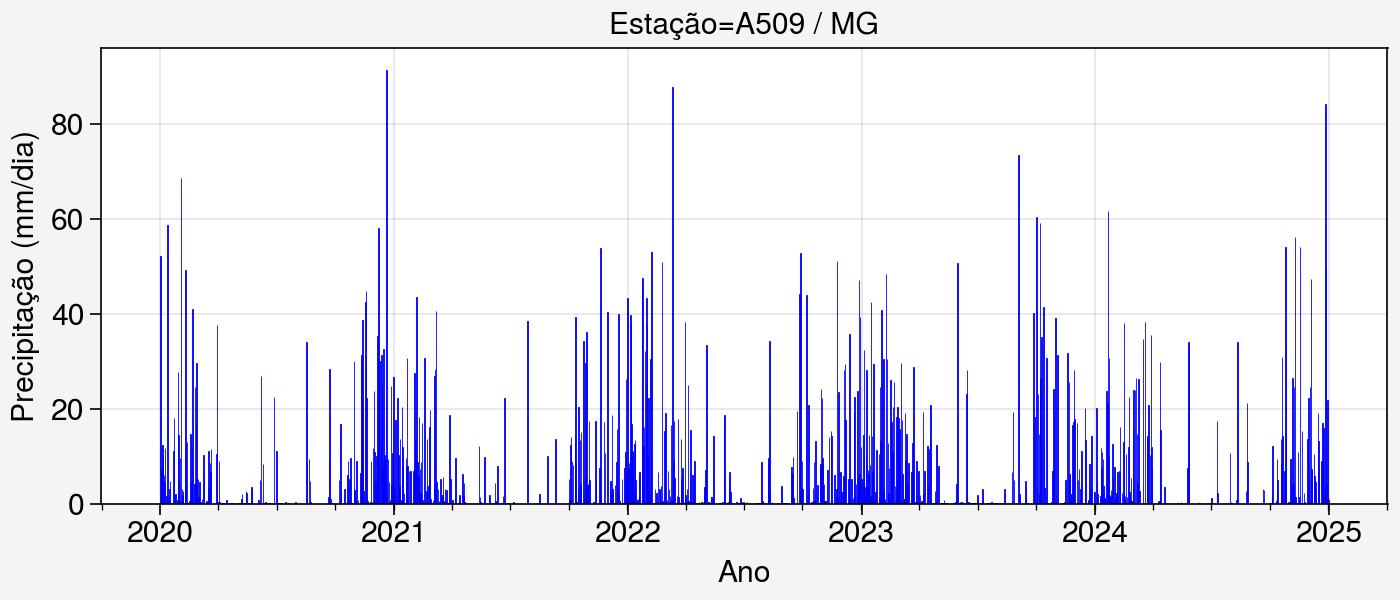

In [ ]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(7, 3), tight=True)

# plota gráfico de barras
ax.bar(diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].index,
       diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'],
       color='blue')

# formato dos eixos
ax.format(title=f'Estação={estacao} / {uf}',
          xlabel='Ano',
          ylabel='Precipitação (mm/dia)',
          small='15px',
          large='15px',
          xrotation=0,
          ytickminor=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_2_diario_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 5):**  Ciclo Mensal: total e climatologia

**Mensal Total**

In [ ]:
# dados que utilizaremos
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
2020-01-01 01:00:00,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2020-01-01 02:00:00,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
2020-01-01 03:00:00,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
2020-01-01 04:00:00,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9
2024-12-31 20:00:00,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1
2024-12-31 21:00:00,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6


Iremos agrupar as variáveis para cada mês da série histórica. No caso da precipitação será a soma da chuva, para as demais variáveis será a média.

In [ ]:
mensal = dados.groupby(pd.Grouper(freq='1M')).mean()
mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1M')).sum()

In [ ]:
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,256.2,846.637097,846.853629,846.415726,1325.280909,18.072043,13.554301,18.758468,17.475403,14.181720,13.034818,80.177419,74.017473,77.275538,298.865591,4.580645,1.509409
2020-02-29,332.4,847.980172,848.188937,847.770259,1046.432274,17.644109,14.152443,18.218678,17.161063,14.643822,13.707615,83.475575,78.487069,81.146552,298.863506,4.944971,1.571983
2020-03-31,119.2,848.745957,848.946361,848.545822,1485.040050,16.517655,11.641509,17.264825,15.819272,12.334636,10.930054,77.756065,71.097035,74.628032,298.002695,4.905121,1.726280
2020-04-30,12.0,849.557083,849.736667,849.369444,1494.828571,14.405000,9.645278,15.288194,13.584861,10.446250,8.862917,78.425000,71.991667,75.358333,298.550000,4.191528,1.464583
2020-05-31,16.4,849.963844,850.160215,849.764651,1311.576550,11.505511,6.089373,12.413575,10.677554,6.778812,5.366849,75.263795,69.264228,72.466216,299.456989,4.291129,1.421371
2020-06-30,65.8,851.284306,851.493750,851.078611,1067.625071,13.351528,9.030199,14.097361,12.632917,9.778237,8.163489,79.305903,72.699463,76.772152,299.758333,4.172917,1.329028
2020-07-31,13.6,850.971102,851.145430,850.778091,1314.086863,12.034946,1.481250,12.974059,11.144220,1.236364,-1.090909,87.562500,72.000000,86.437500,299.147849,4.228495,1.408737
2020-08-31,57.6,851.295968,851.505780,851.089516,1433.329067,12.446640,10.400000,13.358065,11.581317,11.143750,9.243750,69.684211,60.052632,68.000000,298.625000,4.780108,1.611022
2020-09-30,40.4,850.485417,850.698333,850.276528,1532.874026,16.634861,8.602837,17.610000,15.727778,9.419904,7.831655,67.579196,59.799054,63.917258,298.465278,4.582222,1.552917


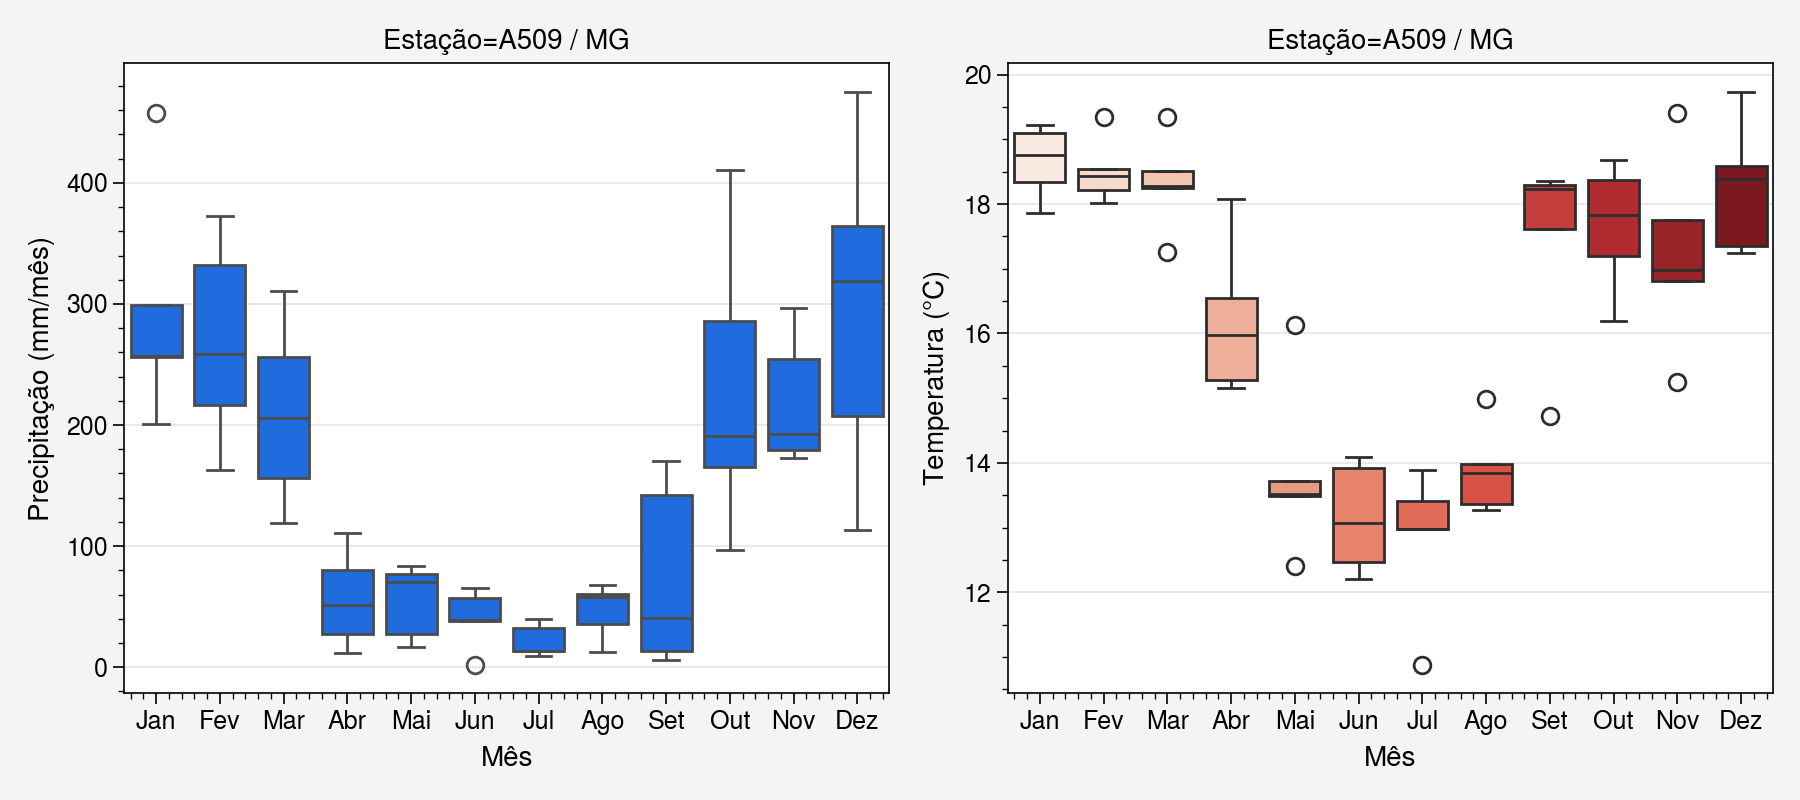

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(figsize=(9, 4), ncols=2)

# criar boxplot de "PRECIPITAÇÃO" mensal
sns.boxplot(x=mensal.index.month, y=mensal['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], ax=ax[0], color='bright blue')
ax[0].set_xlabel('Mês', fontsize=10)
ax[0].set_ylabel('Precipitação (mm/mês)', fontsize=10)
ax[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[0].minorticks_on()
ax[0].set_title(f'Estação={estacao} / {uf}')

# boxplot de "TEMPERATURA" mensal
sns.boxplot(x=mensal.index.month, y=mensal['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], ax=ax[1], palette='Reds')
ax[1].set_xlabel('Mês', fontsize=10)
ax[1].set_ylabel('Temperatura ($\degree$C)', fontsize=10)
ax[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[1].minorticks_on()
ax[1].set_title(f'Estação={estacao} / {uf}')

# salva figura
plt.savefig(f'{dir}/output/{estacao}_Fig_3a_mensal_precipitacao.jpg', dpi=300, bbox_inches='tight')

# exibe figura na tela
plt.tight_layout()
plt.show()

Como podemos ver, criar *boxplots* é uma tarefa razoavelmente simples com Python e `Seaborn`. É possível fazer muito mais (veja a seção da [*Python Graph Gallery*](https://www.python-graph-gallery.com/boxplot/) sobre o tema), como *violinplots* e combinar *stripplots* nos gráficos.

Veja abaixo um resumo sobre os itens que contém um boxplot. Maiores informações clique [aqui](https://blog.proffernandamaciel.com.br/como-ler-um-boxplot/).

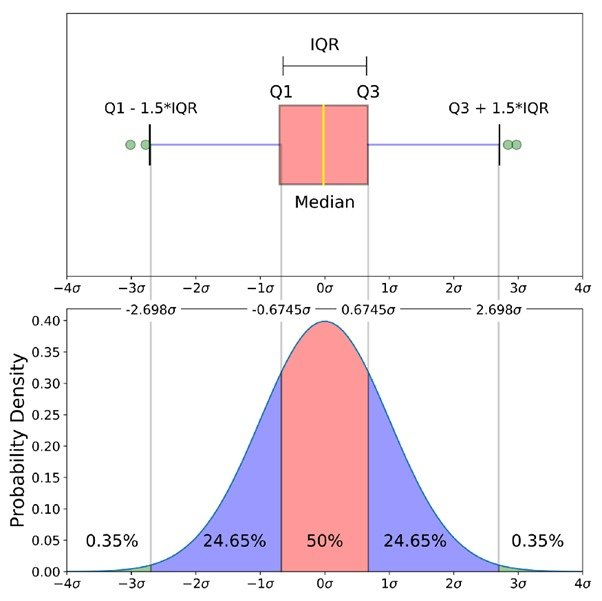

**Mensal climatológica**

In [ ]:
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,256.2,846.637097,846.853629,846.415726,1325.280909,18.072043,13.554301,18.758468,17.475403,14.181720,13.034818,80.177419,74.017473,77.275538,298.865591,4.580645,1.509409
2020-02-29,332.4,847.980172,848.188937,847.770259,1046.432274,17.644109,14.152443,18.218678,17.161063,14.643822,13.707615,83.475575,78.487069,81.146552,298.863506,4.944971,1.571983
2020-03-31,119.2,848.745957,848.946361,848.545822,1485.040050,16.517655,11.641509,17.264825,15.819272,12.334636,10.930054,77.756065,71.097035,74.628032,298.002695,4.905121,1.726280
2020-04-30,12.0,849.557083,849.736667,849.369444,1494.828571,14.405000,9.645278,15.288194,13.584861,10.446250,8.862917,78.425000,71.991667,75.358333,298.550000,4.191528,1.464583
2020-05-31,16.4,849.963844,850.160215,849.764651,1311.576550,11.505511,6.089373,12.413575,10.677554,6.778812,5.366849,75.263795,69.264228,72.466216,299.456989,4.291129,1.421371
2020-06-30,65.8,851.284306,851.493750,851.078611,1067.625071,13.351528,9.030199,14.097361,12.632917,9.778237,8.163489,79.305903,72.699463,76.772152,299.758333,4.172917,1.329028
2020-07-31,13.6,850.971102,851.145430,850.778091,1314.086863,12.034946,1.481250,12.974059,11.144220,1.236364,-1.090909,87.562500,72.000000,86.437500,299.147849,4.228495,1.408737
2020-08-31,57.6,851.295968,851.505780,851.089516,1433.329067,12.446640,10.400000,13.358065,11.581317,11.143750,9.243750,69.684211,60.052632,68.000000,298.625000,4.780108,1.611022
2020-09-30,40.4,850.485417,850.698333,850.276528,1532.874026,16.634861,8.602837,17.610000,15.727778,9.419904,7.831655,67.579196,59.799054,63.917258,298.465278,4.582222,1.552917


In [ ]:
mensal_climatologia = mensal.groupby(mensal.index.month).mean()
mensal_climatologia

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
1,294.24,847.146962,847.366129,846.923656,1267.248049,17.996559,13.688407,18.656909,17.409462,14.283602,13.137031,81.061492,75.225470,78.313844,210.098656,4.662688,1.325538
2,268.76,847.841287,848.057901,847.623483,1238.112925,17.855150,13.986378,18.510929,17.277208,14.567224,13.442927,81.557441,75.790385,78.829074,211.195792,4.494592,1.298000
3,209.80,848.687283,848.896503,848.477363,1351.463422,17.618880,13.213066,18.330626,16.974876,13.855131,12.600457,79.752524,73.567270,76.837452,201.569625,4.237664,1.251761
4,56.40,849.010961,849.198266,848.817628,1421.156821,15.460340,10.999951,16.210738,14.758206,11.701228,10.317333,78.398080,72.457897,75.548153,205.857135,4.178922,1.248873
5,54.88,849.937314,850.135414,849.739270,1250.697965,12.998973,6.579912,13.854098,12.233571,7.412269,5.864592,80.814408,72.558204,76.675377,208.774442,3.591149,1.008956
6,40.36,850.968063,851.159739,850.778307,956.225927,12.334165,6.739142,13.153860,11.535651,7.499245,5.527931,78.817989,69.648058,75.042142,208.360446,3.288124,0.917339
7,21.76,851.649296,851.835476,851.463321,1046.699794,11.909172,4.659720,12.827619,11.037919,5.233727,3.561501,74.607634,66.275834,71.855883,203.192631,3.583769,1.033017
8,46.84,851.041505,851.251259,850.836822,1386.473995,12.984847,6.798938,13.887614,12.152122,7.569959,5.967652,69.363371,61.998923,66.402608,204.488822,4.186647,1.239214
9,74.52,849.795493,850.011499,849.581651,1496.904964,16.546554,8.594647,17.443221,15.715714,9.379929,7.826714,67.473756,60.178906,63.961200,203.585770,4.467588,1.355580


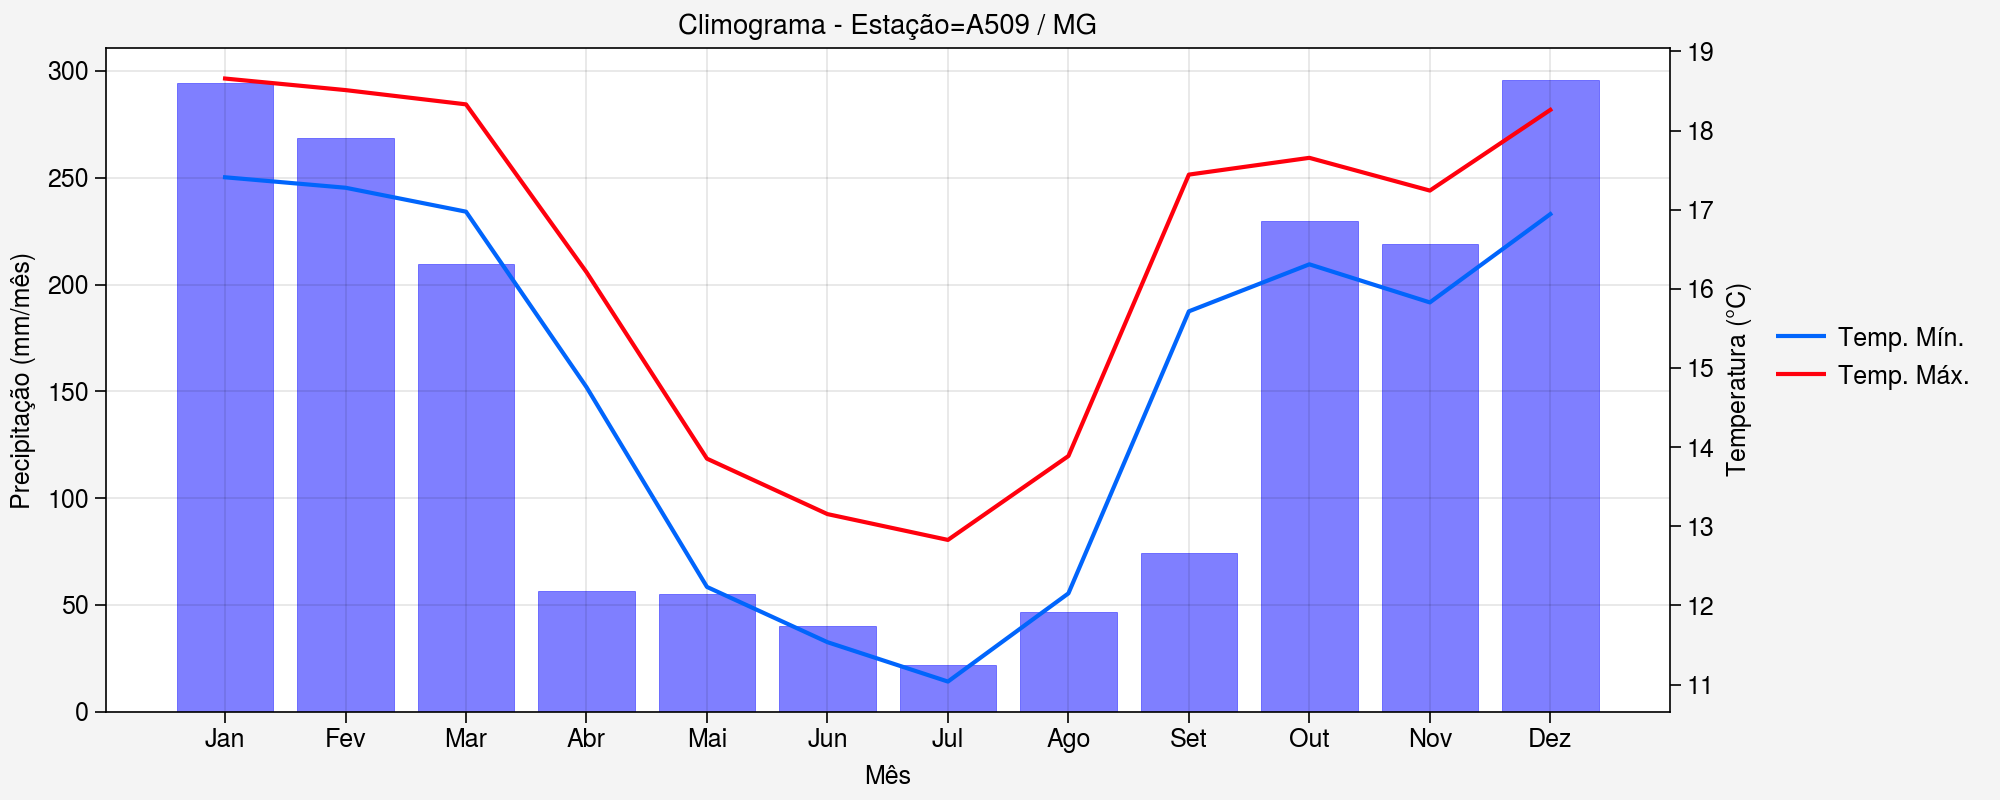

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10,4), tight=True)

# eixos gêmeos em x
ax2 = ax.twinx()

# precipitação
ax.bar(uplt.arange(1, 12, 1), mensal_climatologia['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# temperaturas
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], color='bright blue', label='Temp. Mín.')
ax2.plot(uplt.arange(1, 12, 1), mensal_climatologia['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], color='bright red', label='Temp. Máx.')

# formatações
ax.format(title=f'Climograma - Estação={estacao} / {uf}',
          xlabel='Mês', ylabel='Precipitação (mm/mês)',
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          xticks=uplt.arange(1, 12, 1),
          xtickminor=False, ytickminor=False)

# formato do segundo eixo Y (a direita)
ax2.format(ylabel='Temperatura ($\degree$C)', ytickminor=False)

# legenda
ax2.legend(bbox_to_anchor=(1.2, 0.6), ncols=1, frameon=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_3b_mensal_climatologia_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 6):**  Ciclo Anual: total

In [ ]:
# dados que utilizaremos
dados

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,845.8,845.8,844.8,NaN,16.8,14.7,17.5,16.8,15.2,14.7,87.0,86.0,87.0,303.0,5.4,0.7
2020-01-01 01:00:00,0.0,846.2,846.3,845.8,NaN,16.8,15.0,17.0,16.8,15.1,14.7,89.0,87.0,89.0,293.0,2.2,0.4
2020-01-01 02:00:00,0.0,846.3,846.5,846.2,NaN,15.9,14.3,16.8,15.9,15.0,14.3,90.0,89.0,90.0,291.0,2.7,1.2
2020-01-01 03:00:00,0.0,845.5,846.3,845.5,NaN,15.5,13.8,15.9,15.4,14.3,13.7,90.0,89.0,89.0,293.0,3.3,2.0
2020-01-01 04:00:00,0.2,845.3,845.5,845.3,NaN,14.9,13.3,15.5,14.9,13.8,13.2,90.0,89.0,90.0,293.0,3.3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.8,846.7,847.2,846.6,546.8,17.3,11.2,20.7,17.2,12.7,10.7,68.0,55.0,68.0,139.0,6.2,1.9
2024-12-31 20:00:00,0.2,845.9,846.7,845.7,1667.3,20.8,12.2,20.9,17.2,13.7,11.3,71.0,56.0,58.0,94.0,6.6,1.1
2024-12-31 21:00:00,0.0,846.6,847.0,845.9,762.9,19.6,13.0,20.8,19.1,13.0,11.0,66.0,55.0,66.0,356.0,6.2,0.6


In [ ]:
anual = dados.groupby(pd.Grouper(freq='1Y')).mean()
anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].groupby(pd.Grouper(freq='1Y')).sum()

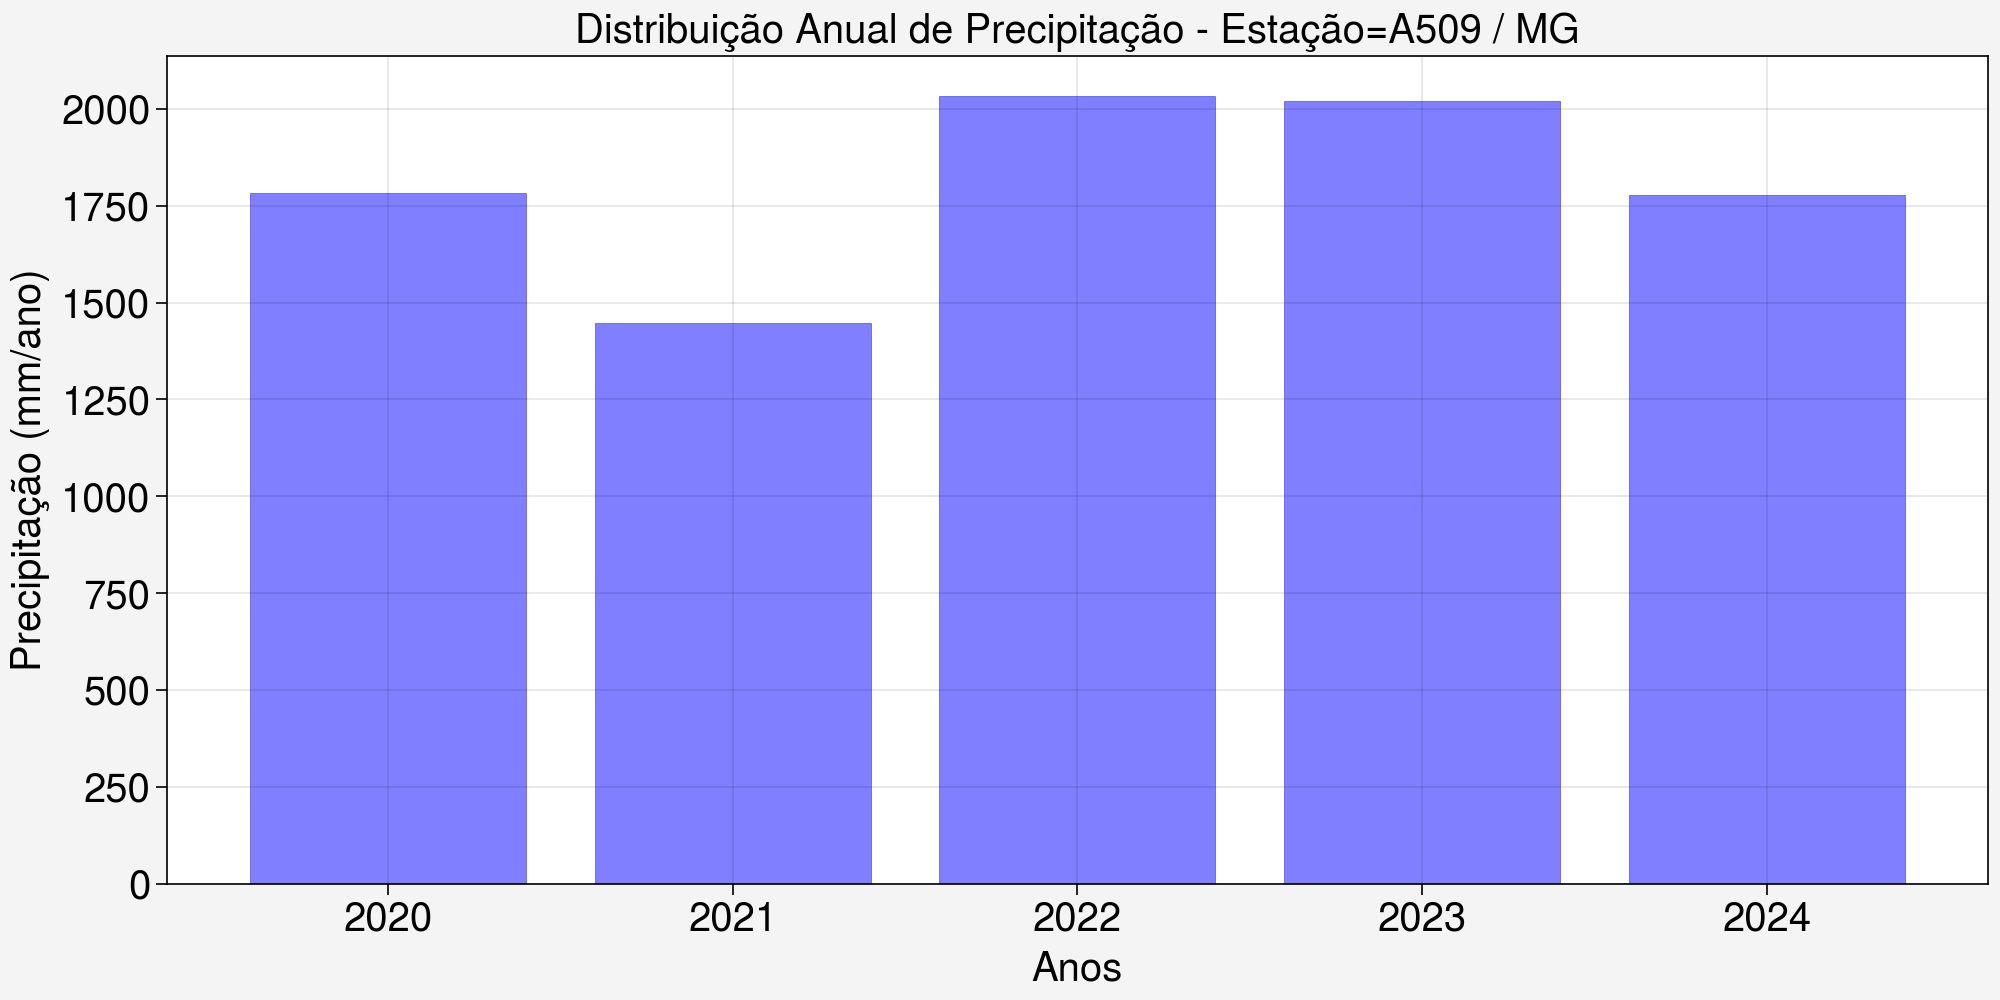

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# precipitação
ax.bar(anual.index.year, anual['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], color='blue', alpha=0.5)

# formatação do eixo
ax.format(title=f'Distribuição Anual de Precipitação - Estação={estacao} / {uf}', xlabel='Anos', ylabel='Precipitação (mm/ano)',
          small='20px', large='20px',
          xtickminor=False, ytickminor=False)

# salva figura
fig.save(f'{dir}/output/{estacao}_Fig_4_anual_precipitacao.jpg', dpi=300)

# exibe figura na tela
uplt.show()

# **PARTE 7):** Salvando a tabela num arquivo CSV

In [ ]:
# mostrando os dados mensais
mensal

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
Data_Hora,,,,,,,,,,,,,,,,,
2020-01-31,256.2,846.637097,846.853629,846.415726,1325.280909,18.072043,13.554301,18.758468,17.475403,14.181720,13.034818,80.177419,74.017473,77.275538,298.865591,4.580645,1.509409
2020-02-29,332.4,847.980172,848.188937,847.770259,1046.432274,17.644109,14.152443,18.218678,17.161063,14.643822,13.707615,83.475575,78.487069,81.146552,298.863506,4.944971,1.571983
2020-03-31,119.2,848.745957,848.946361,848.545822,1485.040050,16.517655,11.641509,17.264825,15.819272,12.334636,10.930054,77.756065,71.097035,74.628032,298.002695,4.905121,1.726280
2020-04-30,12.0,849.557083,849.736667,849.369444,1494.828571,14.405000,9.645278,15.288194,13.584861,10.446250,8.862917,78.425000,71.991667,75.358333,298.550000,4.191528,1.464583
2020-05-31,16.4,849.963844,850.160215,849.764651,1311.576550,11.505511,6.089373,12.413575,10.677554,6.778812,5.366849,75.263795,69.264228,72.466216,299.456989,4.291129,1.421371
2020-06-30,65.8,851.284306,851.493750,851.078611,1067.625071,13.351528,9.030199,14.097361,12.632917,9.778237,8.163489,79.305903,72.699463,76.772152,299.758333,4.172917,1.329028
2020-07-31,13.6,850.971102,851.145430,850.778091,1314.086863,12.034946,1.481250,12.974059,11.144220,1.236364,-1.090909,87.562500,72.000000,86.437500,299.147849,4.228495,1.408737
2020-08-31,57.6,851.295968,851.505780,851.089516,1433.329067,12.446640,10.400000,13.358065,11.581317,11.143750,9.243750,69.684211,60.052632,68.000000,298.625000,4.780108,1.611022
2020-09-30,40.4,850.485417,850.698333,850.276528,1532.874026,16.634861,8.602837,17.610000,15.727778,9.419904,7.831655,67.579196,59.799054,63.917258,298.465278,4.582222,1.552917


**Para formatar melhor a tabela, você pode remover o `index` que esta associado a coluna `Data_Hora` e criar novas colunas para os anos e meses.**

In [ ]:
# remover o índice de datas
nova_tabela = mensal.reset_index(drop=True)

# incluir uma coluna de danos na posição 1
nova_tabela.insert(0, 'Ano', mensal.index.year)

# incluir uma coluna de meses na posição 2
nova_tabela.insert(1, 'Mes', mensal.index.month)

In [ ]:
nova_tabela

,Ano,Mes,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020,1,256.2,846.637097,846.853629,846.415726,1325.280909,18.072043,13.554301,18.758468,17.475403,14.181720,13.034818,80.177419,74.017473,77.275538,298.865591,4.580645,1.509409
1,2020,2,332.4,847.980172,848.188937,847.770259,1046.432274,17.644109,14.152443,18.218678,17.161063,14.643822,13.707615,83.475575,78.487069,81.146552,298.863506,4.944971,1.571983
2,2020,3,119.2,848.745957,848.946361,848.545822,1485.040050,16.517655,11.641509,17.264825,15.819272,12.334636,10.930054,77.756065,71.097035,74.628032,298.002695,4.905121,1.726280
3,2020,4,12.0,849.557083,849.736667,849.369444,1494.828571,14.405000,9.645278,15.288194,13.584861,10.446250,8.862917,78.425000,71.991667,75.358333,298.550000,4.191528,1.464583
4,2020,5,16.4,849.963844,850.160215,849.764651,1311.576550,11.505511,6.089373,12.413575,10.677554,6.778812,5.366849,75.263795,69.264228,72.466216,299.456989,4.291129,1.421371
5,2020,6,65.8,851.284306,851.493750,851.078611,1067.625071,13.351528,9.030199,14.097361,12.632917,9.778237,8.163489,79.305903,72.699463,76.772152,299.758333,4.172917,1.329028
6,2020,7,13.6,850.971102,851.145430,850.778091,1314.086863,12.034946,1.481250,12.974059,11.144220,1.236364,-1.090909,87.562500,72.000000,86.437500,299.147849,4.228495,1.408737
7,2020,8,57.6,851.295968,851.505780,851.089516,1433.329067,12.446640,10.400000,13.358065,11.581317,11.143750,9.243750,69.684211,60.052632,68.000000,298.625000,4.780108,1.611022
8,2020,9,40.4,850.485417,850.698333,850.276528,1532.874026,16.634861,8.602837,17.610000,15.727778,9.419904,7.831655,67.579196,59.799054,63.917258,298.465278,4.582222,1.552917
9,2020,10,96.6,847.860215,848.102016,847.620296,1381.163235,17.047446,10.628668,17.836962,16.345027,11.328937,9.883580,72.678763,65.610215,69.450875,298.573925,5.265054,1.810081


**E agora, você pode `salvar` o `DataFrame` em formato csv com `.to_csv()`:**

In [ ]:
mensal.to_csv(f'{dir}/output/{estacao}_tabela_mensal.csv')